### Análise de dados - Imóveis Leblon e Copacabana
Objetivo desse notebook é a análise de dados de imóveis vendidos no Rio de janeiro entre Julho de 2018 e Fevereiro de 2019 nos Bairros do Leblon e Copacabana.</br>
<br>O notebook foi construído com o auxílio do Jupyter notebook, e a análise de dados foi feita com programação em linguagem python, assim como uso de bibliotecas de análise como pandas, numpy e artifícios de plotagem de gráfico como seaborn e matplotlib.</br>


In [256]:
#Fazendo a importação do arquivo em excel e limpando dados para leitura no Jupyter notebook
#Importação de bibliotecas pandas e numpy para leitura e limpeza dos dados
import pandas as pd
import numpy as np
dados_df = pd.ExcelFile('/home/amanda/Documents/Finance_Dados.xlsx')
dados_df.parse(sheetname='Dados',skiprows=0)
tabnames=dados_df.sheet_names
i=0
df=dados_df.parse(sheetname=tabnames[i], skiprows=0)
#Importação de bibliotecas de visualização dos dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Impressão dos dados em tela para referência
df

,Imovel,Bairro,Metragem,data_compra,data_venda,preco_pedido,Desconto,Corretagem,custo_reforma,custo_aquisicao
0,1,Leblon,193,2018-04-19,2018-10-06,"4,246,000","-84,920","-116,043","-424,600","-3,266,154"
1,2,Leblon,225,2018-07-13,2018-07-27,"4,950,000","-148,500","-312,197","-454,500","-3,807,692"
2,3,Leblon,179,2018-07-30,2019-01-03,"3,938,000","-275,660","-237,343","-409,552","-3,029,231"
3,4,Leblon,175,2018-08-21,2019-01-08,"4,200,000","-126,000","-264,894","-338,800","-3,230,769"
4,5,Leblon,172,2018-09-05,2019-02-02,"4,128,000","-82,560","-263,243","-378,400","-3,175,385"
5,6,Leblon,228,2018-09-14,2019-02-11,"5,472,000","-164,160","-147,908","-441,408","-4,209,231"
6,7,Copacabana,178,2018-09-24,2019-06-01,"3,925,900","-117,777","-106,117","-314,072","-3,019,923"
7,8,Copacabana,151,2018-09-25,2019-12-29,"3,171,420","-190,285","-193,361","-273,301","-2,439,554"
8,9,Leblon,167,2018-09-28,2019-03-14,"3,674,000","-73,480","-100,410","-259,650","-2,826,154"
9,10,Copacabana,222,2018-10-08,2019-07-05,"4,884,000","-293,040",0,"-468,864","-3,756,923"


In [257]:
descr_raw_data = df.describe()
descr_raw_data

,Imovel,Metragem,preco_pedido,Desconto,Corretagem,custo_reforma,custo_aquisicao
count,40,40,40,40,40,40,40
mean,20,158,"3,325,133","-128,945","-128,999","-318,783","-2,557,795"
std,12,41,"1,077,207","79,144","109,743","110,592","828,621"
min,1,90,"1,666,000","-456,000","-350,020","-580,320","-4,222,138"
25%,11,145,"2,601,720","-135,546","-219,570","-408,100","-3,181,154"
50%,20,160,"3,134,210","-102,750","-108,562","-298,080","-2,410,931"
75%,30,178,"4,135,500","-88,551",0,"-240,856","-2,001,323"
max,40,249,"5,488,780","-42,680",0,"-151,782","-1,281,538"


### Analisando a planilha de imóveis dos bairros do Rio de Janeiro
A vantagem de se analisar os dados com o Jupyter é que, já e possível, saber diversos dados sobre a planilha com os dados de venda de imóveis do Leblon e Copacabana.
Já te antemão conseguimos verificar dados importantes, como os seguintes:
<br></br>
<li>O Número de Imóveis: ________________________________________ 40</li>
<li>A média da metragem de cada imóvel: ___________________________ 158 metros</li>
<li>O desconto médio no preço do imóvel: ___________________________ 128,95</li>
<li>O custo máximo de aquisição de um imóvel: _______________________ 4.222.138,00</li>
<li>O custo mínimo de aquisição de um imóvel: _______________________ 1.281.538,00</li>
<li>E o preço médio da corretagem: ________________________________ 129.000,00</li>
<br></br>
Lembrando que os valores aqui mencionados são em reais, e os imóveis vendidos correspondem somente a amostra indicada de 40 unidades mencionadas na planilha.

In [258]:
#Determinando Linha de títulos
cols1 = list(df.columns)
cols1 = [str(x) for x in cols1]
cols1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
Imovel             40 non-null int64
Bairro             40 non-null object
Metragem           40 non-null float64
data_compra        40 non-null datetime64[ns]
data_venda         40 non-null datetime64[ns]
preco_pedido       40 non-null float64
Desconto           40 non-null float64
Corretagem         40 non-null float64
custo_reforma      40 non-null float64
custo_aquisicao    40 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(1), object(1)
memory usage: 3.2+ KB


In [259]:
#Editando dados para que a metragem seja exata, e não de ponto flutuante
pd.options.display.float_format = '{:,.0f}'.format
df
total_preco = df.groupby(['Bairro', 'Metragem']).sum().reset_index()

In [260]:
#Criando duas funções para que a planilha seja dividida entre duas planilhas com os dados por bairro
def leblon(df):
    df_leblon = df.loc[df['Bairro'] == 'Leblon'].copy(deep=True)
    return df_leblon


def copacabana(df):
    df_copacabana = df.loc[df['Bairro'] == 'Copacabana'].copy(deep=True)
    return df_copacabana

In [261]:
df_leblon = leblon(df)
df_leblon

,Imovel,Bairro,Metragem,data_compra,data_venda,preco_pedido,Desconto,Corretagem,custo_reforma,custo_aquisicao
0,1,Leblon,193,2018-04-19,2018-10-06,"4,246,000","-84,920","-116,043","-424,600","-3,266,154"
1,2,Leblon,225,2018-07-13,2018-07-27,"4,950,000","-148,500","-312,197","-454,500","-3,807,692"
2,3,Leblon,179,2018-07-30,2019-01-03,"3,938,000","-275,660","-237,343","-409,552","-3,029,231"
3,4,Leblon,175,2018-08-21,2019-01-08,"4,200,000","-126,000","-264,894","-338,800","-3,230,769"
4,5,Leblon,172,2018-09-05,2019-02-02,"4,128,000","-82,560","-263,243","-378,400","-3,175,385"
5,6,Leblon,228,2018-09-14,2019-02-11,"5,472,000","-164,160","-147,908","-441,408","-4,209,231"
8,9,Leblon,167,2018-09-28,2019-03-14,"3,674,000","-73,480","-100,410","-259,650","-2,826,154"
10,11,Leblon,193,2018-10-15,2019-03-19,"4,246,000","-254,760","-258,879","-407,616","-3,266,154"
12,13,Leblon,178,2018-11-13,2019-04-17,"3,916,000","-78,320","-214,049","-363,280","-3,012,308"
20,21,Leblon,97,2018-11-30,2019-06-02,"2,134,000","-42,680","-77,763","-177,549","-1,641,538"


In [262]:
df_leblon.describe()

,Imovel,Metragem,preco_pedido,Desconto,Corretagem,custo_reforma,custo_aquisicao
count,18,18,18,18,18,18,18
mean,17,175,"3,921,203","-113,933","-194,253","-343,932","-3,016,310"
std,13,39,"984,217","62,862","97,440","107,394","757,090"
min,1,97,"1,748,880","-275,660","-350,020","-503,970","-4,222,138"
25%,5,158,"3,691,500","-122,580","-264,481","-420,838","-3,266,154"
50%,17,175,"4,033,000","-88,382","-225,091","-366,440","-3,102,308"
75%,26,193,"4,246,000","-79,380","-104,319","-276,260","-2,839,615"
max,39,249,"5,488,780","-42,680",0,"-151,782","-1,345,292"


### Analisando a planilha de imóveis no bairro do Leblon
<br></br>
<li>O Número de Imóveis: ________________________________________ 18</li>
<li>A média da metragem de cada imóvel: ___________________________ 175 metros</li>
<li>O desconto médio no preço do imóvel: ___________________________ 113,94</li>
<li>O custo máximo de aquisição de um imóvel: _______________________ 4.222.138,00</li>
<li>O custo mínimo de aquisição de um imóvel: _______________________ 1.345.292,00</li>
<li>E o preço médio da corretagem: ________________________________ 194.253,00</li>
<li>E o custo médio de aquisição : _________________________________ 3.016.310,00</li>
<br></br>
Lembrando que os valores aqui mencionados são em reais, e os imóveis vendidos correspondem somente a amostra indicada de 40 unidades mencionadas na planilha.
Já é possível observar um custo maior tanto médio, quanto absoluto nos preços do Leblon (um bairro mais caro).

In [263]:
df_copacabana = copacabana(df)
df_copacabana

,Imovel,Bairro,Metragem,data_compra,data_venda,preco_pedido,Desconto,Corretagem,custo_reforma,custo_aquisicao
6,7,Copacabana,178,2018-09-24,2019-06-01,"3,925,900","-117,777","-106,117","-314,072","-3,019,923"
7,8,Copacabana,151,2018-09-25,2019-12-29,"3,171,420","-190,285","-193,361","-273,301","-2,439,554"
9,10,Copacabana,222,2018-10-08,2019-07-05,"4,884,000","-293,040",0,"-468,864","-3,756,923"
11,12,Copacabana,146,2018-10-29,2019-03-19,"2,626,560","-131,328",0,"-265,037","-2,020,431"
13,14,Copacabana,98,2018-11-21,2019-02-28,"2,058,000","-102,900",0,"-179,388","-1,583,077"
14,15,Copacabana,156,2018-11-21,2019-04-28,"2,964,000","-88,920","-186,939","-580,320","-2,280,000"
15,16,Copacabana,100,2018-11-28,2019-02-27,"1,800,000","-90,000","-111,006","-220,000","-1,384,615"
16,17,Copacabana,159,2018-11-28,2019-04-19,"3,021,000","-90,630",0,"-341,400","-2,323,846"
17,18,Copacabana,160,2018-11-28,2019-04-24,"3,040,000","-91,200",0,"-416,000","-2,338,462"
18,19,Copacabana,90,2018-11-30,2019-01-09,"1,710,000","-102,600","-74,470","-198,000","-1,315,385"


Text(0.5, 1.0, 'Relação metragem e custo de aquisição - LEBLON')

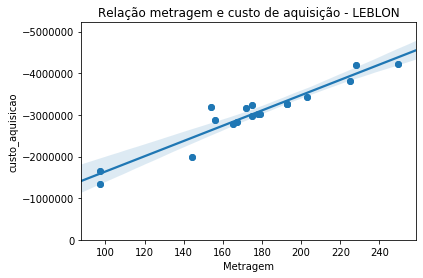

In [264]:
#Plot dos dados em gráfico
plt.scatter(df_leblon['Metragem'], df_leblon['custo_aquisicao'])
ax = sns.regplot(
    data = df_leblon,
    x='Metragem',
    y='custo_aquisicao')
ax.set_ylim(0, df_leblon['custo_aquisicao'].min() -1000000 ,df_leblon['custo_aquisicao'].max() -4500000)
plt.title('Relação metragem e custo de aquisição - LEBLON')

Text(0.5, 1.0, 'Relação metragem e custo de aquisição - COPACABANA')

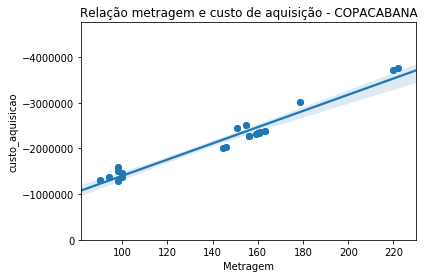

In [265]:
#Plot dos dados em gráfico
plt.scatter(df_copacabana['Metragem'], df_copacabana['custo_aquisicao'])
ax = sns.regplot(
    data = df_copacabana,
    x='Metragem',
    y='custo_aquisicao')
ax.set_ylim(0, df_copacabana['custo_aquisicao'].min() -1000000 ,df_copacabana['custo_aquisicao'].max() -4500000)
plt.title('Relação metragem e custo de aquisição - COPACABANA')

A relação apresentada acima mostra graficamente a alta do preço em relação à metragem. E pela inclinação da curva, é possível perceber que a alta do preço é ainda mais acentuada para os imóveis no bairro do Leblon.

In [266]:
df_copacabana.describe()

,Imovel,Metragem,preco_pedido,Desconto,Corretagem,custo_reforma,custo_aquisicao
count,22,22,22,22,22,22,22
mean,23,144,"2,837,440","-141,227","-75,609","-298,206","-2,182,646"
std,10,38,"903,934","89,904","89,691","111,318","695,334"
min,7,90,"1,666,000","-456,000","-298,483","-580,320","-3,756,923"
25%,15,100,"1,984,500","-143,982","-149,605","-335,646","-2,375,000"
50%,22,156,"2,992,500","-103,549","-37,235","-277,952","-2,301,923"
75%,32,160,"3,087,500","-91,586",0,"-210,100","-1,526,538"
max,40,222,"4,884,000","-66,640",0,"-151,782","-1,281,538"


### Analisando a planilha de imóveis no bairro de Copacabana
<br></br>
<li>O Número de Imóveis: ________________________________________ 22</li>
<li>A média da metragem de cada imóvel: ___________________________ 144 metros</li>
<li>O desconto médio no preço do imóvel: ___________________________ 113,94</li>
<li>O custo máximo de aquisição de um imóvel: _______________________ 3.756.923,00</li>
<li>O custo mínimo de aquisição de um imóvel: _______________________ 1.281.538,00</li>
<li>E o preço médio da corretagem: _________________________________ 75.609,00</li>
<li>E o custo médio de aquisição : _________________________________ 2.182.646,00</li>
<br></br>
Lembrando que os valores aqui mencionados são em reais, e os imóveis vendidos correspondem somente a amostra indicada de 40 unidades mencionadas na planilha.
è possível perceber metragens menores e preços mais baratos que os das propriedades do Leblon.